<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/churn_modeling_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df=df.drop('RowNumber',axis=1)

In [ ]:
df=df.drop('Surname',axis=1)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler(feature_range=(0,1))
x=min.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.6)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
pred=model1.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(ytest,pred)

In [ ]:
acc1

0.8073333333333333

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(xtrain,ytrain)
pred2 = model2.predict(xtest)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc2=accuracy_score(ytest,pred2)
acc2

0.8056666666666666

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
model3 = GaussianNB()
model3.fit(xtrain,ytrain)
pred3 = model3.predict(xtest)
pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc3=accuracy_score(ytest,pred3)
acc3

0.827

In [ ]:
model4= MultinomialNB()
model4.fit(xtrain,ytrain)
pred4 = model4.predict(xtest)
pred4

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc4=accuracy_score(ytest,pred4)
acc4

0.797

In [ ]:
model5=  BernoulliNB()
model5.fit(xtrain,ytrain)
pred5 = model5.predict(xtest)
pred5

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
acc5=accuracy_score(ytest,pred5)
acc5

0.7978333333333333

In [ ]:
Algorithms = ['Linear Regression','KNN',"GaussianNB","MultinomialNB","BernouliNB"]
Accuracy = [round(acc1*100,2),round(acc2*100,2),round(acc3*100,2),round(acc4*100,2),round(acc5*100,2)]
import pandas as pd
performence=pd.DataFrame()
performence['Algorithms']=Algorithms
performence['Accuracy']=Accuracy
performence

,Algorithms,Accuracy
0,Linear Regression,80.73
1,KNN,80.57
2,GaussianNB,82.70
3,MultinomialNB,79.70
4,BernouliNB,79.78


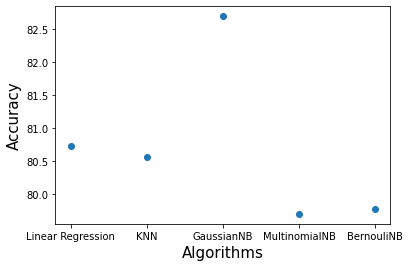

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(performence['Algorithms'],performence['Accuracy'])
plt.xlabel('Algorithms',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.show()